In [33]:
import os
import numpy as np
import pandas as pd
import sklearn

In [34]:
os.listdir()

['.ipynb_checkpoints',
 'example_test.csv',
 'example_train.csv',
 'txt_classification.ipynb',
 'Naive_Bayes_Multinomial_Bernoulli_+Demo.ipynb']

In [35]:
df_train = pd.read_csv('example_train.csv')

In [36]:
df_train

,Document,Class
0,Upgrad is a great educational institution.,education
1,Educational greatness depends on ethics,education
2,A story of great ethics and educational greatness,education
3,Sholey is a great cinema,cinema
4,good movie depends on good story,cinema


# convert labels to numeric type

In [37]:
df_train.Class = df_train['Class'].map({'education': 0, 'cinema': 1})

In [38]:
train_data = df_train.values

In [39]:
X_data = train_data[:, 0]
y_data = train_data[:, 1].astype('int')

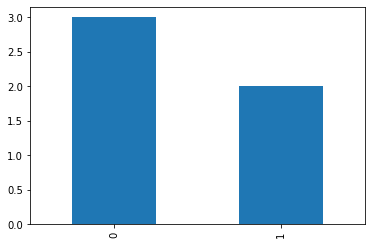

In [41]:
df_train.Class.value_counts().plot.bar()
plt.show()

In [42]:
X_data

array(['Upgrad is a great educational institution.',
       'Educational greatness depends on ethics',
       'A story of great ethics and educational greatness',
       'Sholey is a great cinema', 'good movie depends on good story'],
      dtype=object)

In [43]:
y_data

array([0, 0, 0, 1, 1])

In [44]:
cls_dict = {0 : 'education', 1 : 'cinema'}

## To make a bag of words import CountVectorizer from sklearn

In [46]:
from sklearn.feature_extraction.text import CountVectorizer

In [59]:
vec = CountVectorizer()

In [60]:
vec.fit(X_data)
vec.vocabulary_

{'upgrad': 15,
 'is': 9,
 'great': 6,
 'educational': 3,
 'institution': 8,
 'greatness': 7,
 'depends': 2,
 'on': 12,
 'ethics': 4,
 'story': 14,
 'of': 11,
 'and': 0,
 'sholey': 13,
 'cinema': 1,
 'good': 5,
 'movie': 10}

In [61]:
vec = CountVectorizer(stop_words='english')
vec.fit(X_data)
vec.vocabulary_

{'upgrad': 11,
 'great': 5,
 'educational': 2,
 'institution': 7,
 'greatness': 6,
 'depends': 1,
 'ethics': 3,
 'story': 10,
 'sholey': 9,
 'cinema': 0,
 'good': 4,
 'movie': 8}

In [62]:
vec.get_feature_names()

['cinema',
 'depends',
 'educational',
 'ethics',
 'good',
 'great',
 'greatness',
 'institution',
 'movie',
 'sholey',
 'story',
 'upgrad']

## transform training data matrix into sparse matrix representation which sklearn uses for efficiency

In [72]:
vec = CountVectorizer(stop_words='english')
vec.fit(X_data)
X_transformed = vec.transform(X_data)

### original array

In [73]:
X_transformed.toarray()

array([[0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1],
       [0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0],
       [0, 1, 0, 0, 2, 0, 0, 0, 1, 0, 1, 0]])

### original array as pandas dataframe

In [74]:
pd.DataFrame(X_transformed.toarray(), columns=vec.get_feature_names())

,cinema,depends,educational,ethics,good,great,greatness,institution,movie,sholey,story,upgrad
0,0,0,1,0,0,1,0,1,0,0,0,1
1,0,1,1,1,0,0,1,0,0,0,0,0
2,0,0,1,1,0,1,1,0,0,0,1,0
3,1,0,0,0,0,1,0,0,0,1,0,0
4,0,1,0,0,2,0,0,0,1,0,1,0


In [75]:
### sparse array
print(X_transformed)

  (0, 2)	1
  (0, 5)	1
  (0, 7)	1
  (0, 11)	1
  (1, 1)	1
  (1, 2)	1
  (1, 3)	1
  (1, 6)	1
  (2, 2)	1
  (2, 3)	1
  (2, 5)	1
  (2, 6)	1
  (2, 10)	1
  (3, 0)	1
  (3, 5)	1
  (3, 9)	1
  (4, 1)	1
  (4, 4)	2
  (4, 8)	1
  (4, 10)	1


## Test data

In [88]:
test_df = pd.read_csv('example_test.csv')
test_df.Class = test_df.Class.map({'education': 0, 'cinema': 1})

In [89]:
test_arr = test_df.values
X_test = test_arr[:, 0]
y_test = test_arr[:, 1]
print(X_test, y_test)

['very good educational institution'] [0]


## Apply only transform to test data

In [91]:
X_test_transformed = vec.transform(X_test)

In [93]:
print(X_test_transformed)

  (0, 2)	1
  (0, 4)	1
  (0, 7)	1


In [94]:
print(X_test_transformed.toarray())

[[0 0 1 0 1 0 0 1 0 0 0 0]]


## Multinomial Naive Bayes with sklearn

In [95]:
from sklearn.naive_bayes import MultinomialNB

1) Create object
2) fit model
3) transform/predict 

In [97]:
mnb = MultinomialNB()
mnb.fit(X_transformed, y_data)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [121]:
prob = mnb.predict_proba(X_test_transformed)

In [122]:
print('prob of {}: {}'.format(cls_dict[0], prob[0][0]))
print('prob of {}: {}'.format(cls_dict[1], prob[0][1]))

prob of education: 0.6719160104986874
prob of cinema: 0.3280839895013124


### try without sparse matrix representation

In [125]:
mnb1 = MultinomialNB()
mnb1.fit(X_transformed.toarray(), y_data)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [127]:
mnb1.predict_proba(X_test_transformed.toarray())

array([[0.67191601, 0.32808399]])

## Building Bernoulli' Naive Bayes model

In [128]:
from sklearn.naive_bayes import BernoulliNB

In [129]:
bnb = BernoulliNB()
bnb.fit(X_transformed, y_data)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [132]:
prob = bnb.predict_proba(X_test_transformed)

In [133]:
print('prob of {}: {}'.format(cls_dict[0], prob[0][0]))
print('prob of {}: {}'.format(cls_dict[1], prob[0][1]))

prob of education: 0.7673625951301384
prob of cinema: 0.23263740486986176
